In [30]:
%pip install psycopg2-binary
%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install python-dotenv

  Using cached psycopg2_binary-2.9.10-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
Using cached psycopg2_binary-2.9.10-cp312-cp312-win_amd64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\alarc\\Desktop\\BI\\venv\\Lib\\site-packages\\psycopg2\\_psycopg.cp312-win_amd64.pyd'
Check the permissions.



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)


In [31]:
import psycopg2
import os
from dotenv import load_dotenv

def main():
    # Load environment variables from the .env file
    load_dotenv()

    # Get the DATABASE_URL from the environment
    database_url = os.getenv('DATABASE_URL')

    # Connect to the PostgreSQL database
    conn = psycopg2.connect(database_url)

    # Example query
    query_sql = 'SELECT VERSION()'

    # Execute the query
    cur = conn.cursor()
    cur.execute(query_sql)

    # Fetch the result
    version = cur.fetchone()[0]
    print(f"Database Version: {version}")

    # Close the cursor and connection
    cur.close()
    conn.close()


if __name__ == "__main__":
    main()


Database Version: PostgreSQL 16.4 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 13.3.1 20240522 (Red Hat 13.3.1-1), 64-bit


In [32]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv

# Conéctate a tu base de datos PostgreSQL
try:
    conn = psycopg2.connect(os.getenv('DATABASE_URL'))
    print("Conexión exitosa a la base de datos")
except Exception as e:
    print(f"No se pudo conectar a la base de datos. Error: {e}")


Conexión exitosa a la base de datos


In [11]:
# Escribir tu consulta SQL
query = "SELECT * FROM invoice;"

# Ejecutar la consulta y cargarla en un DataFrame
df_invoice = pd.read_sql(query, conn)

# Mostrar los primeros 5 registros
print(df_invoice.head())


C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\2579750320.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_invoice = pd.read_sql(query, conn)


   invoice_id  customer_id invoice_date          billing_address billing_city  \
0           1            2   2021-01-01  Theodor-Heuss-Straße 34    Stuttgart   
1           2            4   2021-01-02         Ullevålsveien 14         Oslo   
2           3            8   2021-01-03          Grétrystraat 63     Brussels   
3           4           14   2021-01-06           8210 111 ST NW     Edmonton   
4           5           23   2021-01-11          69 Salem Street       Boston   

  billing_state billing_country billing_postal_code  total  
0          None         Germany               70174   1.98  
1          None          Norway                0171   3.96  
2          None         Belgium                1000   5.94  
3            AB          Canada             T6G 2C7   8.91  
4            MA             USA                2113  13.86  


In [12]:
# Eliminar filas con valores nulos
df_invoice_clean = df_invoice.dropna()

# Eliminar duplicados
df_invoice_clean = df_invoice.drop_duplicates()


In [13]:
# Agrupar por cliente_id y sumar el total de las facturas
df_total_by_customer = df_invoice.groupby('customer_id')['total'].sum().reset_index()

# Mostrar el resultado
print(df_total_by_customer)


    customer_id  total
0             1  39.62
1             2  37.62
2             3  39.62
3             4  39.62
4             5  40.62
5             6  49.62
6             7  42.62
7             8  37.62
8             9  37.62
9            10  37.62
10           11  37.62
11           12  37.62
12           13  37.62
13           14  37.62
14           15  38.62
15           16  37.62
16           17  39.62
17           18  37.62
18           19  38.62
19           20  39.62
20           21  37.62
21           22  39.62
22           23  37.62
23           24  43.62
24           25  42.62
25           26  47.62
26           27  37.62
27           28  43.62
28           29  37.62
29           30  37.62
30           31  37.62
31           32  37.62
32           33  37.62
33           34  39.62
34           35  37.62
35           36  37.62
36           37  43.62
37           38  37.62
38           39  38.62
39           40  38.62
40           41  37.62
41           42  39.62
42         

In [14]:
# Consulta para obtener los clientes
query_customers = "SELECT * FROM customer;"
df_customers = pd.read_sql(query_customers, conn)

# Unir ambas tablas por customer_id
df_merged = pd.merge(df_invoice, df_customers, on='customer_id')

# Mostrar el resultado
print(df_merged.head())


   invoice_id  customer_id invoice_date          billing_address billing_city  \
0           1            2   2021-01-01  Theodor-Heuss-Straße 34    Stuttgart   
1           2            4   2021-01-02         Ullevålsveien 14         Oslo   
2           3            8   2021-01-03          Grétrystraat 63     Brussels   
3           4           14   2021-01-06           8210 111 ST NW     Edmonton   
4           5           23   2021-01-11          69 Salem Street       Boston   

  billing_state billing_country billing_postal_code  total first_name  ...  \
0          None         Germany               70174   1.98     Leonie  ...   
1          None          Norway                0171   3.96      Bjørn  ...   
2          None         Belgium                1000   5.94       Daan  ...   
3            AB          Canada             T6G 2C7   8.91       Mark  ...   
4            MA             USA                2113  13.86       John  ...   

  company                  address       cit

C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\4260178332.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql(query_customers, conn)


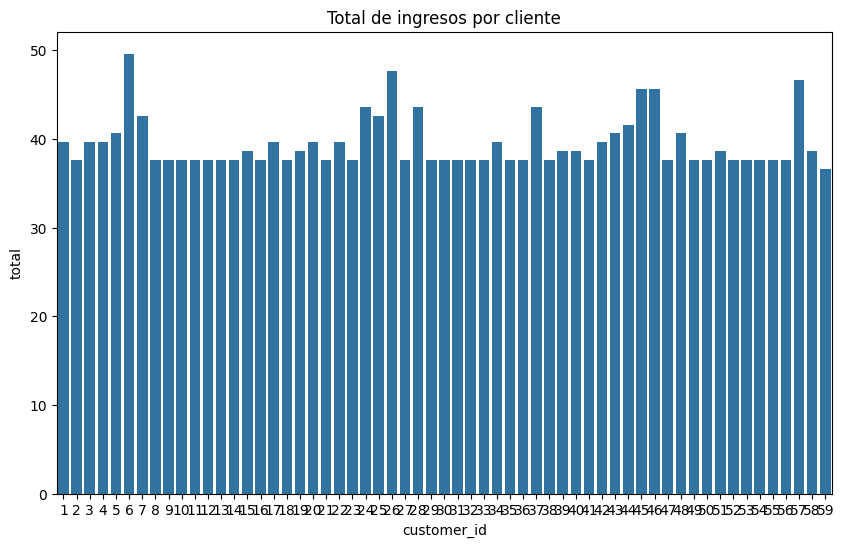

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras de los ingresos por cliente
plt.figure(figsize=(10,6))
sns.barplot(x='customer_id', y='total', data=df_total_by_customer)
plt.title('Total de ingresos por cliente')
plt.show()


In [42]:
query_ventas_por_cliente = """
SELECT 
    c.customer_id,  -- Incluimos el ID del cliente
    c.first_name, c.last_name, c.email, 
    i.invoice_date, i.total, 
    il.quantity, il.unit_price, 
    t.track_id,
    t.name as track_name
FROM 
    customer c
JOIN invoice i ON c.customer_id = i.customer_id
JOIN invoice_line il ON i.invoice_id = il.invoice_id
JOIN track t ON il.track_id = t.track_id;
"""
df_ventas_por_cliente = pd.read_sql(query_ventas_por_cliente, conn)
print(df_ventas_por_cliente.head())

C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\1299987630.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ventas_por_cliente = pd.read_sql(query_ventas_por_cliente, conn)


   customer_id first_name last_name                  email invoice_date  \
0            2     Leonie    Köhler  leonekohler@surfeu.de   2021-01-01   
1            2     Leonie    Köhler  leonekohler@surfeu.de   2021-01-01   
2            4      Bjørn    Hansen  bjorn.hansen@yahoo.no   2021-01-02   
3            4      Bjørn    Hansen  bjorn.hansen@yahoo.no   2021-01-02   
4            4      Bjørn    Hansen  bjorn.hansen@yahoo.no   2021-01-02   

   total  quantity  unit_price  track_id             track_name  
0   1.98         1        0.99         2      Balls to the Wall  
1   1.98         1        0.99         4      Restless and Wild  
2   3.96         1        0.99         6  Put The Finger On You  
3   3.96         1        0.99         8       Inject The Venom  
4   3.96         1        0.99        10             Evil Walks  


In [35]:
query_ventas_por_artista_album = """
SELECT 
    a.artist_id,  -- Incluimos el ID del artista
    al.album_id,  -- Incluimos el ID del álbum
    a.name as artist_name, 
    al.title as album_title, 
    SUM(il.unit_price * il.quantity) as total_sales
FROM 
    artist a
JOIN album al ON a.artist_id = al.artist_id
JOIN track t ON al.album_id = t.album_id
JOIN invoice_line il ON t.track_id = il.track_id
GROUP BY a.artist_id, al.album_id, a.name, al.title
ORDER BY total_sales DESC;
"""

df_ventas_por_artista_album = pd.read_sql(query_ventas_por_artista_album, conn)
print(df_ventas_por_artista_album.head())


C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\2397620914.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ventas_por_artista_album = pd.read_sql(query_ventas_por_artista_album, conn)


   artist_id  album_id                     artist_name  \
0        158       253  Battlestar Galactica (Classic)   
1        156       251                      The Office   
2         17        23                   Chico Buarque   
3        149       231                            Lost   
4        148       228                          Heroes   

                                album_title  total_sales  
0  Battlestar Galactica (Classic), Season 1        35.82  
1                      The Office, Season 3        31.84  
2                            Minha Historia        26.73  
3                            Lost, Season 2        25.87  
4                          Heroes, Season 1        25.87  


In [36]:
query_ventas_por_genero = """
SELECT 
    g.genre_id,  -- Incluimos el ID del género
    g.name as genre_name, 
    SUM(il.unit_price * il.quantity) as total_sales
FROM 
    genre g
JOIN track t ON g.genre_id = t.genre_id
JOIN invoice_line il ON t.track_id = il.track_id
GROUP BY g.genre_id, g.name
ORDER BY total_sales DESC;
"""

df_ventas_por_genero = pd.read_sql(query_ventas_por_genero, conn)
print(df_ventas_por_genero.head())


   genre_id          genre_name  total_sales
0         1                Rock       826.65
1         7               Latin       382.14
2         3               Metal       261.36
3         4  Alternative & Punk       241.56
4        19            TV Shows        93.53


C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\2905761222.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ventas_por_genero = pd.read_sql(query_ventas_por_genero, conn)


In [37]:
query_ingresos_por_fecha = """
SELECT 
    i.invoice_date, 
    SUM(i.total) as total_revenue
FROM 
    invoice i
GROUP BY i.invoice_date
ORDER BY i.invoice_date;
"""


df_ingresos_por_fecha = pd.read_sql(query_ingresos_por_fecha, conn)
print(df_ingresos_por_fecha.head())


  invoice_date  total_revenue
0   2021-01-01           1.98
1   2021-01-02           3.96
2   2021-01-03           5.94
3   2021-01-06           8.91
4   2021-01-11          13.86


C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\2381474565.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ingresos_por_fecha = pd.read_sql(query_ingresos_por_fecha, conn)


In [38]:
query_ventas_por_pais_ciudad = """
SELECT 
    c.customer_id,  -- Incluimos el ID del cliente
    c.country, c.city, 
    SUM(i.total) as total_sales
FROM 
    customer c
JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY c.customer_id, c.country, c.city
ORDER BY total_sales DESC;
"""


df_ventas_por_pais_ciudad = pd.read_sql(query_ventas_por_pais_ciudad, conn)
print(df_ventas_por_pais_ciudad.head())


   customer_id         country        city  total_sales
0            6  Czech Republic      Prague        49.62
1           26             USA  Fort Worth        47.62
2           57           Chile    Santiago        46.62
3           45         Hungary    Budapest        45.62
4           46         Ireland      Dublin        45.62


C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\2733607543.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ventas_por_pais_ciudad = pd.read_sql(query_ventas_por_pais_ciudad, conn)


In [39]:
query_productos_mas_vendidos = """
SELECT 
    t.track_id,  -- Incluimos el ID de la canción (track)
    t.name as track_name, 
    SUM(il.quantity) as total_sold, 
    SUM(il.unit_price * il.quantity) as total_revenue
FROM 
    track t
JOIN invoice_line il ON t.track_id = il.track_id
GROUP BY t.track_id, t.name
ORDER BY total_sold DESC;
"""


df_productos_mas_vendidos = pd.read_sql(query_productos_mas_vendidos, conn)
print(df_productos_mas_vendidos.head())


C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\1954082876.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos_mas_vendidos = pd.read_sql(query_productos_mas_vendidos, conn)


   track_id                 track_name  total_sold  total_revenue
0       449           Calling Dr. Love           2           1.98
1      2959  Hallelujah Here She Comes           2           1.98
2      3177                   Hot Girl           2           3.98
3      1853                    Battery           2           1.98
4       867                       Açai           2           1.98


In [40]:
query_ingresos_por_empleado = """
SELECT 
    e.employee_id,  -- Incluimos el ID del empleado
    e.first_name, e.last_name, e.title, 
    SUM(i.total) as total_sales
FROM 
    employee e
JOIN customer c ON e.employee_id = c.support_rep_id
JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY e.employee_id, e.first_name, e.last_name, e.title
ORDER BY total_sales DESC;
"""


df_ingresos_por_empleado = pd.read_sql(query_ingresos_por_empleado, conn)
print(df_ingresos_por_empleado.head())


   employee_id first_name last_name                title  total_sales
0            3       Jane   Peacock  Sales Support Agent       833.04
1            4   Margaret      Park  Sales Support Agent       775.40
2            5      Steve   Johnson  Sales Support Agent       720.16


C:\Users\alarc\AppData\Local\Temp\ipykernel_18608\3872845799.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ingresos_por_empleado = pd.read_sql(query_ingresos_por_empleado, conn)


In [43]:
# Exportar todos los reportes a CSV
df_ventas_por_cliente.to_csv('ventas_por_cliente.csv', index=False)
df_ventas_por_artista_album.to_csv('ventas_por_artista_album.csv', index=False)
df_ventas_por_genero.to_csv('ventas_por_genero.csv', index=False)
df_ingresos_por_fecha.to_csv('ingresos_por_fecha.csv', index=False)
df_ventas_por_pais_ciudad.to_csv('ventas_por_pais_ciudad.csv', index=False)
df_productos_mas_vendidos.to_csv('productos_mas_vendidos.csv', index=False)
df_ingresos_por_empleado.to_csv('ingresos_por_empleado.csv', index=False)
